# MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os 
import seaborn as sns
import glob
import natsort

In [2]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    return data

def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"] + data["gn"].astype(str)
        if "LR" in path:
            data["LR"] = float(path.split("LR")[1][:3])
        else:
            data["LR"] = 0.1
        if "G11" in path:
            data["Mode"] = "G11"
            if "Lin" in path:
                data["Decay"] = "GN_Lin"
            else:
                data["Decay"] = "GN_No"
        else:
            data["Decay"] = "No"
        if "G00" in path or "G11" in path:
             pass
        else:
            continue
        if len(data_) == 0: 
            data_ = data
        else: 
            data_ = pd.concat([data_, data])
    return data_

# Digits

In [3]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/emnist-*/s[1-9].csv"
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    data_temp['Mode'] = data_temp['Mode'] .map({'fedavg0': "FedAvg", 
                                                'fedprox0': "FedProx", 
                                                'scaffold0': "Scaffold",  
                                                'feddyn0': "FedDyn", 
                                                'G11': "FedGN",
                                                # 'G12': "FedGN(dim=0)",
                                               })
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN", "FedGN+mean"]
    sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN"]
    print(data_temp["Mode"].unique())
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn', "FedGN", "FedGN(dim=0)"]
    data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    print(data_temp.size)
    return data_temp

['FedAvg' 'Scaffold' 'FedGN' 'FedDyn' 'FedProx']
154198
(40, 22)
(38, 22)
(40, 22)


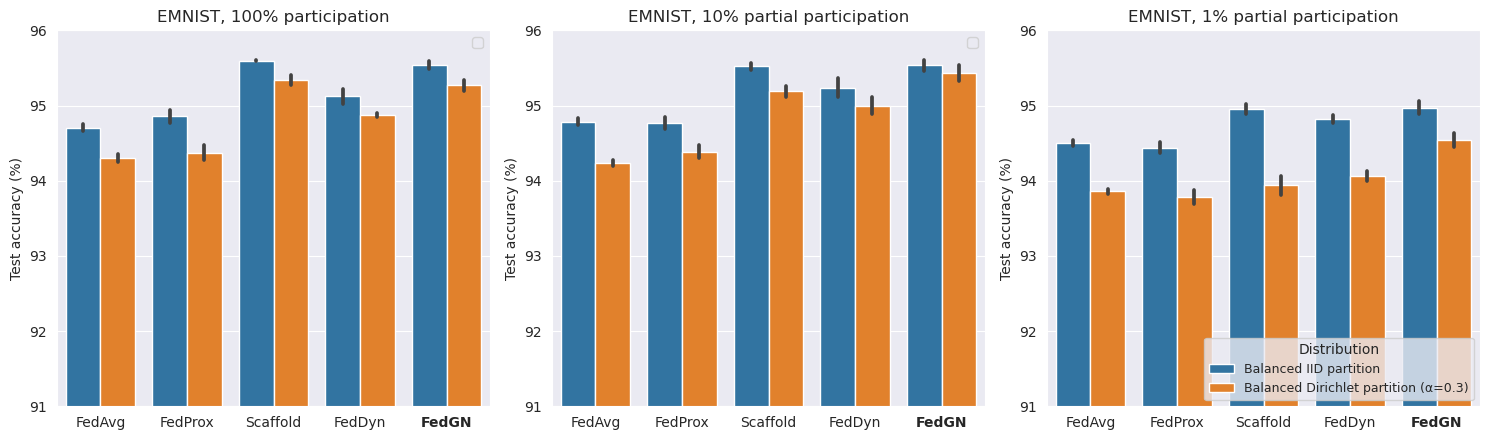

In [6]:
data_temp = load_data()

fig, axes = plt.subplots(1, 3, figsize=(15,4.5), dpi=100, sharey=False)
sns.set_style("darkgrid")

for i, ap, lr, epoch in zip(range(3), [1., 0.1, 0.01], [0.8, 0.8, 0.8], [499,499,499]):
    ax = axes[i]
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == epoch]
    temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == lr)]
    temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
    print(temp.shape)
    ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, hue="Distribution", errorbar="se")

for ax in axes.flatten():
    ax.set_xlabel("")
    ax.get_xticklabels()[-1].set_fontweight('bold')
    ax.set_ylim([91, 96])
    ax.set_ylabel("Test accuracy (%)")

axes[0].legend('')
axes[1].legend('')
axes[2].legend(title="Distribution", loc=4, prop={'size': 9}), 
axes[0].set_title("EMNIST, 100% participation")
axes[1].set_title("EMNIST, 10% partial participation")
axes[2].set_title("EMNIST, 1% partial participation")
fig.tight_layout()

['FedAvg' 'Scaffold' 'FedGN' 'FedDyn' 'FedProx']
130900
(941, 22)
(1900, 22)
(2000, 22)


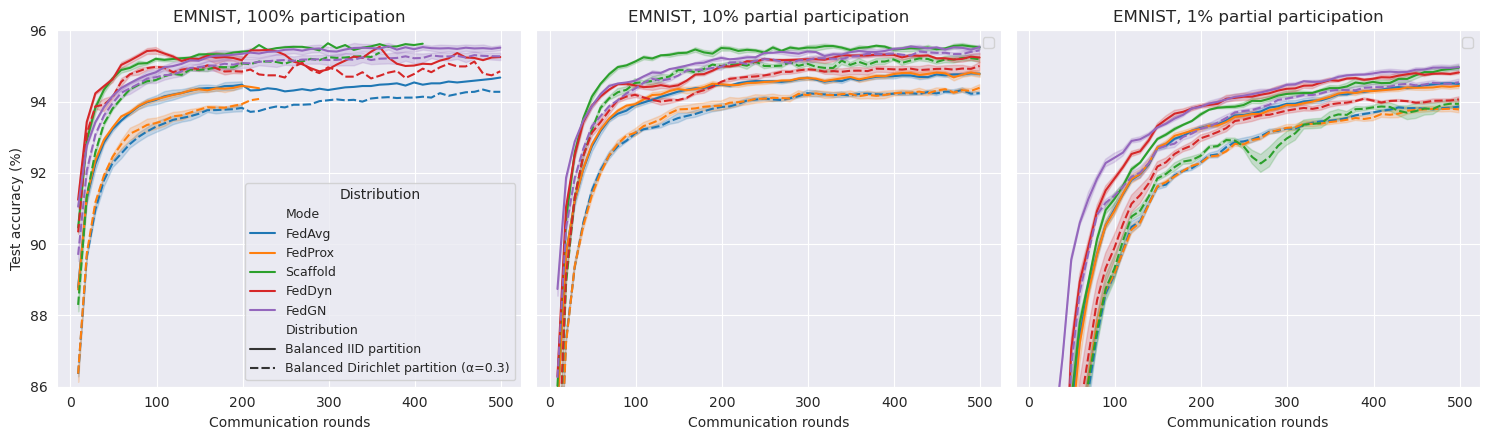

In [5]:
data_temp = load_data()

fig, axes = plt.subplots(1, 3, figsize=(15,4.5), dpi=100, sharey=True)
sns.set_style("darkgrid")

for i, ap, epoch in zip(range(3), [1,0.1,0.01], [499,499,499]):
    ax = axes[i]
    temp = copy.deepcopy(data_temp)
    # temp = temp[temp["epoch"] <= 200]
    temp = temp[temp["act_prob"] == ap]
    temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 0.8)]
    temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
    print(temp.shape)
    ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")

for ax in axes.flatten():
    ax.set_xlabel("Communication rounds")
    ax.set_ylabel("Test accuracy (%)"), 

axes[0].set_ylim([86, 96])
axes[0].legend(title="Distribution", loc=4, prop={'size': 9}), 
axes[1].legend(""), 
axes[2].legend(""), 
axes[0].set_title("EMNIST, 100% participation")
axes[1].set_title("EMNIST, 10% partial participation")
axes[2].set_title("EMNIST, 1% partial participation")
fig.tight_layout()

In [6]:
sk = ["Balanced IID partition", ]

['FedAvg' 'Scaffold' 'FedGN' 'FedDyn' 'FedProx']
130900
(473, 22)
(468, 22)
(950, 22)
(950, 22)
(1000, 22)
(1000, 22)


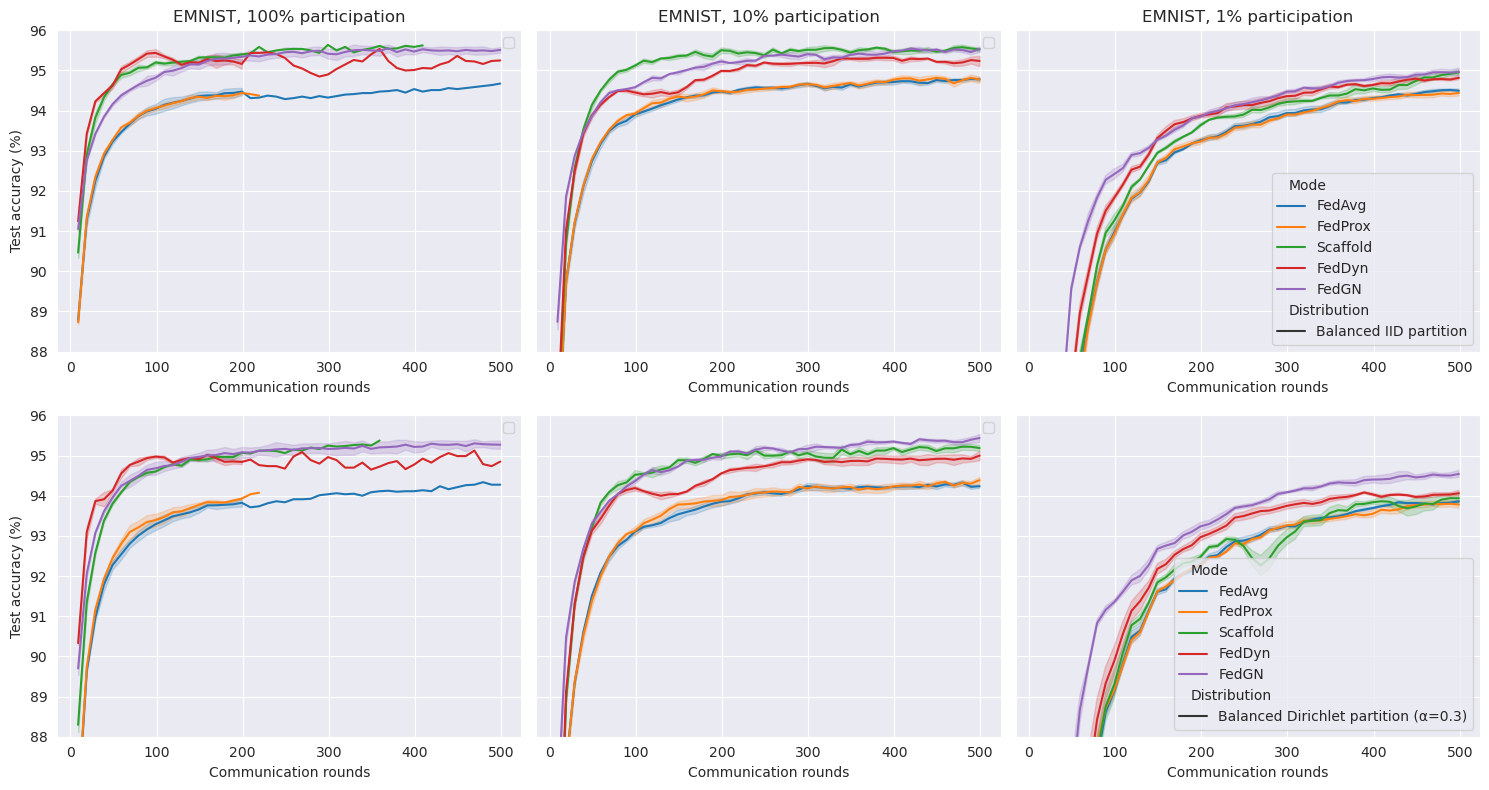

In [7]:
data_temp = load_data()

fig, axes = plt.subplots(2, 3, figsize=(15,8), dpi=100, sharey=True)
sns.set_style("darkgrid")

for i, ap, epoch in zip(range(3), [1,0.1,0.01], [199,499,499]):
    ax = axes[0,i]
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["Distribution"] == "Balanced IID partition"]
    temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 0.8)]
    temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
    print(temp.shape)
    ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")
    
    ax = axes[1,i]
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["Distribution"] == "Balanced Dirichlet partition (α=0.3)"]
    temp = temp[(temp["LR"] == 0.1) | (temp["LR"] == 0.8)]
    temp = temp[(temp["Decay"] == "No") | (temp["Decay"] == "GN_No")]
    print(temp.shape)
    ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style="Distribution", errorbar="se")

for ax in axes.flatten():
    ax.set_xlabel("Communication rounds")
    ax.set_ylabel("Test accuracy (%)"), 
    ax.set_ylim([88, 96])

axes[0,0].legend(""), 
axes[0,1].legend(""), 
axes[1,0].legend(""), 
axes[1,1].legend(""), 
axes[0,0].set_title("EMNIST, 100% participation")
axes[0,1].set_title("EMNIST, 10% participation")
axes[0,2].set_title("EMNIST, 1% participation")
fig.tight_layout()